In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from tempfile import TemporaryFile
import csv
import numpy as np
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [0]:
X = np.load('/content/gdrive/My Drive/data_3_levels_balanced_128_128_3.npy') 
Y = np.load('/content/gdrive/My Drive/labels_3_levels_balanced.npy')

In [4]:
print(X.shape)
print(X)

(7393, 128, 128, 3)
[[[[193. 193. 185.]
   [193. 193. 185.]
   [193. 193. 185.]
   ...
   [201. 202. 188.]
   [199. 200. 186.]
   [196. 197. 183.]]

  [[194. 194. 186.]
   [194. 194. 186.]
   [194. 194. 186.]
   ...
   [201. 202. 188.]
   [199. 200. 186.]
   [196. 197. 183.]]

  [[195. 195. 187.]
   [195. 195. 187.]
   [195. 195. 187.]
   ...
   [200. 201. 187.]
   [199. 200. 186.]
   [196. 197. 183.]]

  ...

  [[200. 200. 188.]
   [199. 199. 187.]
   [198. 198. 186.]
   ...
   [126. 130. 115.]
   [122. 126. 111.]
   [182. 189. 173.]]

  [[200. 200. 188.]
   [200. 200. 188.]
   [199. 199. 187.]
   ...
   [118. 122. 107.]
   [ 91.  95.  80.]
   [155. 162. 146.]]

  [[200. 200. 188.]
   [200. 200. 188.]
   [199. 199. 187.]
   ...
   [174. 178. 163.]
   [155. 159. 144.]
   [199. 206. 190.]]]


 [[[204. 204. 192.]
   [202. 202. 190.]
   [200. 200. 188.]
   ...
   [209. 207. 195.]
   [210. 208. 196.]
   [214. 212. 200.]]

  [[204. 204. 192.]
   [203. 203. 191.]
   [201. 201. 189.]
   ...
 

In [5]:
print(Y.shape)
print(Y)

(7393, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [0]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [7]:
x_train = X[:6393]
y_train = Y[:6393]
print(x_train.shape)
print(y_train.shape)

(6393, 128, 128, 3)
(6393, 3)


In [8]:
x_val = X[6393:6893]
y_val = Y[6393:6893]
print(x_val.shape)
print(y_val.shape)

(500, 128, 128, 3)
(500, 3)


In [9]:
x_test = X[6893:]
y_test = Y[6893:]
print(x_test.shape)
print(y_test.shape)

(500, 128, 128, 3)
(500, 3)


(128, 128, 3)


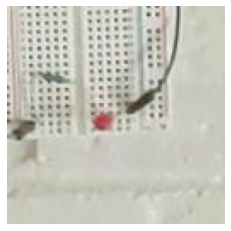

[1. 0. 0.]


In [10]:
# picking a test sample before generating adversarial examples 
Image = X[ 2, :]
print( Image.shape )
r,g,b = cv2.split(Image)       # get b,g,r
Image = cv2.merge([r,g,b])

plt.imshow( Image.astype('uint8') )
plt.axis( 'off' )
plt.show( )
print(Y[2])

In [11]:
import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [12]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(128,128,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)

for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

"""
restnet.trainable = True
set_trainable = False
for layer in restnet.layers:
    if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in restnet.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])
restnet.summary()
"""

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  import sys


"\nrestnet.trainable = True\nset_trainable = False\nfor layer in restnet.layers:\n    if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False\nlayers = [(layer, layer.name, layer.trainable) for layer in restnet.layers]\npd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])\nrestnet.summary()\n"

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.regularizers import l2
model_Sigmoid = Sequential()
model_Sigmoid.add(restnet)
model_Sigmoid.add(Dense(512, activation='relu', input_dim=(128,128,3), kernel_regularizer=l2(0.001)))
model_Sigmoid.add(Dropout(0.2))
model_Sigmoid.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_Sigmoid.add(Dropout(0.2))
model_Sigmoid.add(Dense(3, activation='sigmoid'))
model_Sigmoid.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model_Sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 32768)             23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 40,629,635
Trainable params: 17,041,923
Non-trainable params: 23,587,712
_________________________________

In [15]:
# RMSprop ###(lr = 0.001 -> [72.6NOG, 46.00NOG, 27.2N])###(lr = 0.0001 -> [79.6NOG, 79.00NOG, 76.8NOG])###(lr = 0.00001 -> [77.99NOG, 80.00NOG, 72.2NOG])###
# Adam ###(lr = 0.001 -> [30.19N, 31.6N, 31.6N])###(lr = 0.0001 -> [78.6NOG, 78.39NOG, 78.2NOG])###(lr = 0.00001 -> [80.8NOG, 71.2NOG, 75.4NOG])###
# SGD ###(lr = 0.001 -> [79.79BNOG, 78.79BNOG, 73.4OG])###(lr = 0.0001 -> [64.6OG, 67.79OG, 72.39OG]])###(lr = 0.00001 -> [45.8GG, 41.99GG, 44.99GG])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning BNOG = Better than not learning but also somewhat okay learning

#SGD lr = 0.001       ### 79.0% (SGD, lr = 0.001, f1 = 0.783332)

model_Sigmoid.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 6393 samples, validate on 500 samples
Epoch 1/10
6393/6393 [==============================] - 37s 6ms/step - loss: 2.3253 - accuracy: 0.6324 - val_loss: 2.3087 - val_accuracy: 0.6260
Epoch 2/10
6393/6393 [==============================] - 26s 4ms/step - loss: 1.9810 - accuracy: 0.8068 - val_loss: 2.1977 - val_accuracy: 0.7080
Epoch 3/10
6393/6393 [==============================] - 26s 4ms/step - loss: 1.8531 - accuracy: 0.8706 - val_loss: 2.1476 - val_accuracy: 0.7180
Epoch 4/10
6393/6393 [==============================] - 27s 4ms/step - loss: 1.7827 - accuracy: 0.8977 - val_loss: 2.1182 - val_accuracy: 0.7440
Epoch 5/10
6393/6393 [==============================] - 27s 4ms/step - loss: 1.7263 - accuracy: 0.9226 - val_loss: 2.1121 - val_accuracy: 0.7380
Epoch 6/10
6393/6393 [==============================] - 27s 4ms/step - loss: 1.7003 - accuracy: 0.9340 - val_loss: 2.1156 - val_accuracy: 0.7060
Epoch 7/10
6393/6393 [==============================] - 27s 4ms/step - loss: 1.6765

In [16]:
model_Sigmoid.evaluate(x_test, y_test)

500/500 [==============================] - 3s 6ms/step


[2.0015900821685793, 0.7900000214576721]

In [17]:
# predict probabilities for test set
yhat_probs_Sigmoid = model_Sigmoid.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Sigmoid = model_Sigmoid.predict_classes(x_test, verbose=0)
yhat_probs_Sigmoid = np.argmax(yhat_probs_Sigmoid, axis=1)
print(yhat_probs_Sigmoid.shape)
print(yhat_classes_Sigmoid.shape)

(500,)
(500,)


In [18]:
print(y_test.shape)
y_test_Sigmoid = np.argmax(y_test, axis=1)
print(y_test_Sigmoid.shape)

(500, 3)
(500,)


In [19]:
# accuracy: (tp + tn) / (p + n)
accuracy_Sigmoid = accuracy_score(y_test_Sigmoid, yhat_classes_Sigmoid)
print('Accuracy Sigmoid: %f' % accuracy_Sigmoid)
# precision tp / (tp + fp)
precision_Sigmoid = precision_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Precision Sigmoid: %f' % precision_Sigmoid)
# recall: tp / (tp + fn)
recall_Sigmoid = recall_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Recall Sigmoid: %f' % recall_Sigmoid)
# f1: 2 tp / (2 tp + fp + fn)
f1_Sigmoid = f1_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('F1 score Sigmoid: %f' % f1_Sigmoid)

Accuracy Sigmoid: 0.790000
Precision Sigmoid: 0.785100
Recall Sigmoid: 0.782949
F1 score Sigmoid: 0.783332


In [20]:
model_Softmax = Sequential()
model_Softmax.add(restnet)
model_Softmax.add(Dense(512, activation='relu', input_dim=(128,128,3), kernel_regularizer=l2(0.001)))
model_Softmax.add(Dropout(0.2))
model_Softmax.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_Softmax.add(Dropout(0.2))
model_Softmax.add(Dense(3, activation='softmax'))
model_Softmax.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00001),
              metrics=['accuracy'])
model_Softmax.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 32768)             23587712  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1539      
Total params: 40,629,635
Trainable params: 17,041,923
Non-trainable params: 23,587,712
_________________________________

In [0]:
# RMSprop ###(lr = 0.001 -> [82.2NOG, 82.59NOG, 78.2NOG])###(lr = 0.0001 -> [70.80NOG, 78.6NOG, 75.19NOG])###(lr = 0.00001 -> [76.2NOG, 73.19NOG, 75.59NOG])###
# Adam ###(lr = 0.001 -> [78.79NOG, 74.19NOG, 82.8NOG])###(lr = 0.0001 -> [79.19NOG, 76.39NOG, 74.4NOG])###(lr = 0.00001 -> [79.6NOG, 82.99OG, 81.4NOG])###
# SGD ###(lr = 0.001 -> [79.6BNOG, 80.4BNOG, 69.8NOG])###(lr = 0.0001 -> [73.6OG, 66.2OG, 75.19OG])###(lr = 0.00001 -> [46.59GG, 47.99GG, 51.8GG])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#Adam lr = 0.00001    ### 77.6% (Adam, lr = 0.00001, f1 = 0.754175)

model_Softmax.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 6393 samples, validate on 500 samples
Epoch 1/10
6393/6393 [==============================] - 31s 5ms/step - loss: 2.1691 - accuracy: 0.7186 - val_loss: 2.2365 - val_accuracy: 0.6460
Epoch 2/10
3712/6393 [================>.............] - ETA: 10s - loss: 1.8210 - accuracy: 0.8807

In [0]:
model_Softmax.evaluate(x_test, y_test)

In [0]:
# predict probabilities for test set
yhat_probs_Softmax = model_Softmax.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Softmax = model_Softmax.predict_classes(x_test, verbose=0)
yhat_probs_Softmax = np.argmax(yhat_probs_Softmax, axis=1)
print(yhat_probs_Softmax.shape)
print(yhat_classes_Softmax.shape)

In [0]:
print(y_test.shape)
y_test_Softmax = np.argmax(y_test, axis=1)
print(y_test_Softmax.shape)

In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Softmax = accuracy_score(y_test_Softmax, yhat_classes_Softmax)
print('Accuracy Softmax: %f' % accuracy_Softmax)
# precision tp / (tp + fp)
precision_Softmax = precision_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Precision Softmax: %f' % precision_Softmax)
# recall: tp / (tp + fn)
recall_Softmax = recall_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Recall Softmax: %f' % recall_Softmax)
# f1: 2 tp / (2 tp + fp + fn)
f1_Softmax = f1_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('F1 score Softmax: %f' % f1_Softmax)